# <center>Web Scraping & EDA on Laptop Data through Flipkart Website</center>

<img src="https://d502jbuhuh9wk.cloudfront.net/articles/65683478e4b0bd55188d8e6a/DPhyJbestlaptopsfordataanalysisunder30000inindia.jpg" 
     width="600" 
     height="400" />

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [23]:
url_laptop = 'https://www.flipkart.com/search?q=laptop+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='

In [24]:
#checking url request
r1 = requests.get(url_laptop)
print(r1)

<Response [200]>


## Scraping Laptop Dataset through Flipkart Website

In [25]:
for i in range(1,2):
    url = url_laptop+str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'lxml')
    box = soup.find('div',class_='_1YokD2 _3Mn1Gg')
    
    Laptop_Names = []
    Laptop_Prices = []
    Laptop_Ratings = []

    names = box.find_all('div',class_='_4rR01T')
    for i in names:
        n = i.text
        Laptop_Names.append(n)

    prices = box.find_all('div',class_='_30jeq3 _1_WHN1')
    for i in prices:
        n = i.text
        Laptop_Prices.append(n)

    ratings = box.find_all('div',class_='_3LWZlK')
    for i in ratings:
        n = i.text
        Laptop_Ratings.append(n)

In [5]:
# print the scraped data
print(Laptop_Names,Laptop_Prices,Laptop_Ratings)

['AXL Intel Celeron Dual Core 9th Gen - (4 GB/256 GB SSD/Windows 11 Home) 15W_LAP02 Thin and Light Lapto...', 'DELL Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) New Inspiron 15 Laptop Thin and ...', 'DELL Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Windows 11 Home) New Inspiron 15 Laptop Thin and ...', 'HP 15s (2023) AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB SSD/Windows 11 Home) 15-fc0028AU Thin and Lig...', 'DELL Intel Core i3 11th Gen 1115G4 - (8 GB/256 GB SSD/Windows 11 Home) Vostro 3420 Notebook', 'HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop', 'SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1235U - (16 GB/512 GB SSD/Windows 11 Home) NP550 Thin and...', 'HP Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5202TU Thin and Light Laptop', 'Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1155G7 - (8 GB/512 GB SSD/Windows 11 Home) 15ITL6 Thin an...', 'Lenovo IdeaPad Slim 3 Intel Core i5 1

In [26]:
#converting the data to pandas dataframe to perform EDA
df = pd.DataFrame({'Name':Laptop_Names,'Prices':Laptop_Prices,'Ratings':Laptop_Ratings})
df

,Name,Prices,Ratings
0,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,"₹84,990",3.3
1,DELL Intel Core i5 12th Gen 1235U - (8 GB/512 ...,"₹44,990",4
2,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U - (8...,"₹42,490",4
3,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹39,183",4.3
4,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,"₹47,990",4.2
5,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,"₹44,990",4.2
6,ASUS TUF Gaming F15 - AI Powered Gaming Intel ...,"₹48,990",4.3
7,HP Intel Core i5 12th Gen 1235U - (8 GB/512 GB...,"₹49,490",4.3
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,"₹41,990",4.2
9,ASUS Vivobook Go 15 OLED (2023) AMD Ryzen 5 Qu...,"₹44,990",4.4


In [27]:
#saving dataset into excel format 
df.to_csv('laptop_dataset.csv',index = False)

### Data Pre-Processing on Laptop Dataset

In [28]:
laptop_df = pd.read_csv('laptop_dataset.csv')
laptop_df

,Name,Prices,Ratings
0,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,"₹84,990",3.3
1,DELL Intel Core i5 12th Gen 1235U - (8 GB/512 ...,"₹44,990",4.0
2,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U - (8...,"₹42,490",4.0
3,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹39,183",4.3
4,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,"₹47,990",4.2
5,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,"₹44,990",4.2
6,ASUS TUF Gaming F15 - AI Powered Gaming Intel ...,"₹48,990",4.3
7,HP Intel Core i5 12th Gen 1235U - (8 GB/512 GB...,"₹49,490",4.3
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,"₹41,990",4.2
9,ASUS Vivobook Go 15 OLED (2023) AMD Ryzen 5 Qu...,"₹44,990",4.4


In [29]:
#statstical analysis
laptop_df.describe()

,Ratings
count,24.000000
mean,4.116667
std,0.300241
min,3.300000
25%,4.000000
50%,4.200000
75%,4.300000
max,4.500000


In [30]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     24 non-null     object 
 1   Prices   24 non-null     object 
 2   Ratings  24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 708.0+ bytes


In [31]:
laptop_df.shape

(24, 3)

In [32]:
# Adding new columns
laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str
del laptop_df['Name']
laptop_df.head()

C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\1888531185.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str
C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\1888531185.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str


,Prices,Ratings,model,specs
0,"₹84,990",3.3,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,(16 GB/512 GB SSD/Windows 11 Home) SFG14-72T...
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,(8 GB/512 GB SSD/Windows 11 Home) New Inspiro...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,(8 GB/512 GB SSD/Windows 11 Home) 15-fc0028AU...
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,(16 GB/512 GB SSD/Windows 11 Home) NP550 Thin...


In [33]:
laptop_df['RAM'],laptop_df['HDD'] = laptop_df['specs'].str.split('(',1).str
del laptop_df['specs']
laptop_df.head()

C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\1031651380.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['RAM'],laptop_df['HDD'] = laptop_df['specs'].str.split('(',1).str
C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\1031651380.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'],laptop_df['HDD'] = laptop_df['specs'].str.split('(',1).str


,Prices,Ratings,model,RAM,HDD
0,"₹84,990",3.3,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,,16 GB/512 GB SSD/Windows 11 Home) SFG14-72T...
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,,8 GB/512 GB SSD/Windows 11 Home) New Inspiron ...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,,8 GB/512 GB SSD/Windows 11 Home) 15-fc0028AU T...
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,,8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,,16 GB/512 GB SSD/Windows 11 Home) NP550 Thin a...


In [34]:
laptop_df['RAM'],laptop_df['Hard Disk'] = laptop_df['HDD'].str.split('/',1).str
del laptop_df['HDD']
laptop_df.head()

C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\952747979.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['RAM'],laptop_df['Hard Disk'] = laptop_df['HDD'].str.split('/',1).str
C:\Users\DataTrained\AppData\Local\Temp\ipykernel_904\952747979.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'],laptop_df['Hard Disk'] = laptop_df['HDD'].str.split('/',1).str


,Prices,Ratings,model,RAM,Hard Disk
0,"₹84,990",3.3,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,16 GB,512 GB SSD/Windows 11 Home) SFG14-72T...
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,8 GB,512 GB SSD/Windows 11 Home) 15-fc0028AU Thin a...
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...


In [35]:
# rename columns
laptop_df.rename(columns = {'Prices':'Model_Price','Ratings':'Product_Ratings','model':'Product_Name'},inplace = True)
laptop_df.head()

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,"₹84,990",3.3,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,16 GB,512 GB SSD/Windows 11 Home) SFG14-72T...
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,8 GB,512 GB SSD/Windows 11 Home) 15-fc0028AU Thin a...
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...


In [36]:
#identifying missing values
laptop_df.isnull()

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [37]:
laptop_df.isnull().sum()

Model_Price        0
Product_Ratings    0
Product_Name       0
RAM                0
Hard Disk          0
dtype: int64

In [38]:
laptop_df['Product_Name'].nunique()

20

In [39]:
laptop_df['Product_Name'].value_counts()

HP AMD Ryzen 5 Hexa Core 5500U                                  3
ASUS TUF Gaming F15                                             2
DELL Intel Core i5 12th Gen 1235U                               2
Acer Swift Go 14 AI Powered EVO Intel Core Ultra 5 125H         1
ASUS Vivobook 15 AMD Ryzen 7 Octa Core 5800HS                   1
Lenovo IdeaPad Slim 3 AMD Ryzen 5 Quad Core 7520U               1
HP 15s Intel Core i5 12th Gen                                   1
DELL Intel Core i3 12th Gen 1215U                               1
MSI GF63 Intel Core i5 11th Gen 11260H                          1
Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 11300H           1
ASUS Vivobook 15 Intel Core i3 12th Gen i3                      1
DELL Inspiron 15 Intel Core i5 11th Gen                         1
HP 15s Intel Core i5 12th Gen 1235U                             1
ASUS Vivobook Go 15 OLED (2023) AMD Ryzen 5 Quad Core 7520U     1
Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1155G7             1
HP Intel C

In [40]:
laptop_df.describe()

,Product_Ratings
count,24.000000
mean,4.116667
std,0.300241
min,3.300000
25%,4.000000
50%,4.200000
75%,4.300000
max,4.500000


In [41]:
laptop_df.dtypes

Model_Price         object
Product_Ratings    float64
Product_Name        object
RAM                 object
Hard Disk           object
dtype: object

In [42]:
laptop_df

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,"₹84,990",3.3,Acer Swift Go 14 AI Powered EVO Intel Core Ult...,16 GB,512 GB SSD/Windows 11 Home) SFG14-72T...
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,8 GB,512 GB SSD/Windows 11 Home) 15-fc0028AU Thin a...
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...
5,"₹44,990",4.2,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) 15ITL6 Thin a...
6,"₹48,990",4.3,ASUS TUF Gaming F15,8 GB,512 GB SSD/Windows 11 Ho...
7,"₹49,490",4.3,HP Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5202TU Thin ...
8,"₹41,990",4.2,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,8 GB,512 GB SSD/Windows 11 Home) 15ITL6 Thin an...
9,"₹44,990",4.4,ASUS Vivobook Go 15 OLED (2023) AMD Ryzen 5 Qu...,8 GB,512 GB SSD/Windows 11 Home) E1504F...


## EDA on Laptop Dataset

In [43]:
# Best laptops under budget of INR 30000

laptop_df[laptop_df.Model_Price<'₹30000']

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk


In [44]:
#Best laptops between INR 30000 and INR 40000 with Ratings greater than equals to 4.0

laptop_df[(laptop_df.Model_Price>'₹30000') & (laptop_df.Model_Price<'₹40000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
3,"₹39,183",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
10,"₹39,990",4.1,DELL Inspiron 15 Intel Core i5 11th Gen,8 GB,512 GB SSD/Windows 11 Home) IN35117W5CCS01ORB1...


In [45]:
#Best laptops between INR 40000 and INR 50000 with Ratings greater than equals to 4.0

laptop_df[(laptop_df.Model_Price>'₹40000') & (laptop_df.Model_Price<'₹50000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
1,"₹44,990",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
2,"₹42,490",4.0,HP 15s (2023) AMD Ryzen 5 Quad Core 7520U,8 GB,512 GB SSD/Windows 11 Home) 15-fc0028AU Thin a...
4,"₹47,990",4.2,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...
5,"₹44,990",4.2,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) 15ITL6 Thin a...
6,"₹48,990",4.3,ASUS TUF Gaming F15,8 GB,512 GB SSD/Windows 11 Ho...
7,"₹49,490",4.3,HP Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5202TU Thin ...
8,"₹41,990",4.2,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,8 GB,512 GB SSD/Windows 11 Home) 15ITL6 Thin an...
9,"₹44,990",4.4,ASUS Vivobook Go 15 OLED (2023) AMD Ryzen 5 Qu...,8 GB,512 GB SSD/Windows 11 Home) E1504F...
12,"₹47,990",4.1,ASUS Vivobook 15 AMD Ryzen 7 Octa Core 5800HS,16 GB,512 GB SSD/Windows 11 Home) M1502QA-EJ742WS Th...
13,"₹42,890",4.1,ASUS Vivobook 15 Intel Core i3 12th Gen i3,8 GB,512 GB SSD/Windows 11 Home) X1502ZA-EJ385WS T...


In [46]:
#Best laptops between INR 40000 and INR 50000 with Ratings greater than equals to 4.0

laptop_df[(laptop_df.Model_Price>'₹50000') & (laptop_df.Model_Price<'₹60000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
11,"₹52,000",4.3,HP 15s Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin ...


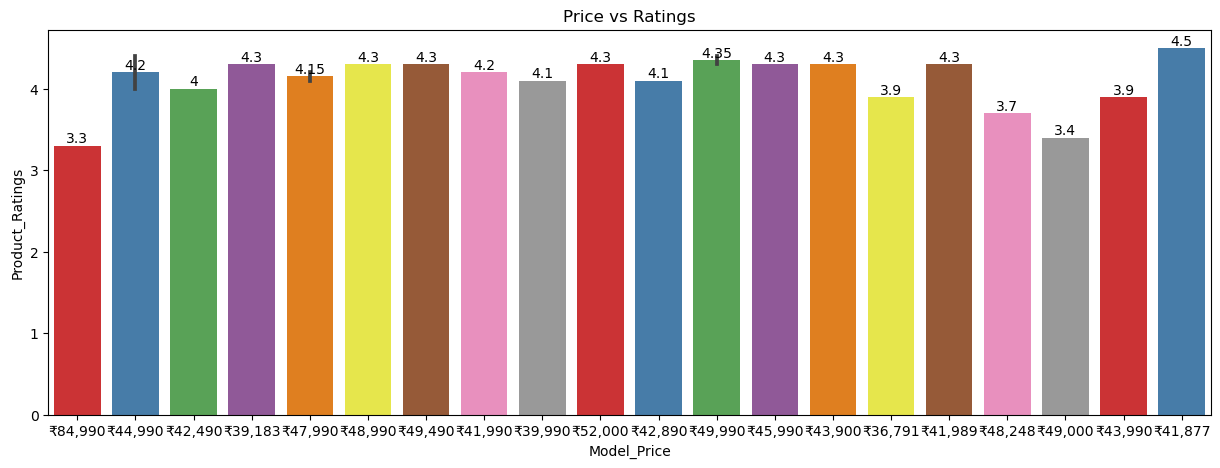

In [54]:
#Price vs Ratings

plt.figure(figsize=(15,5))
pc = sns.barplot(laptop_df, x='Model_Price', y='Product_Ratings',palette = 'Set1')
plt.title('Price vs Ratings')
for bars in pc.containers:
    pc.bar_label(bars)
plt.show()

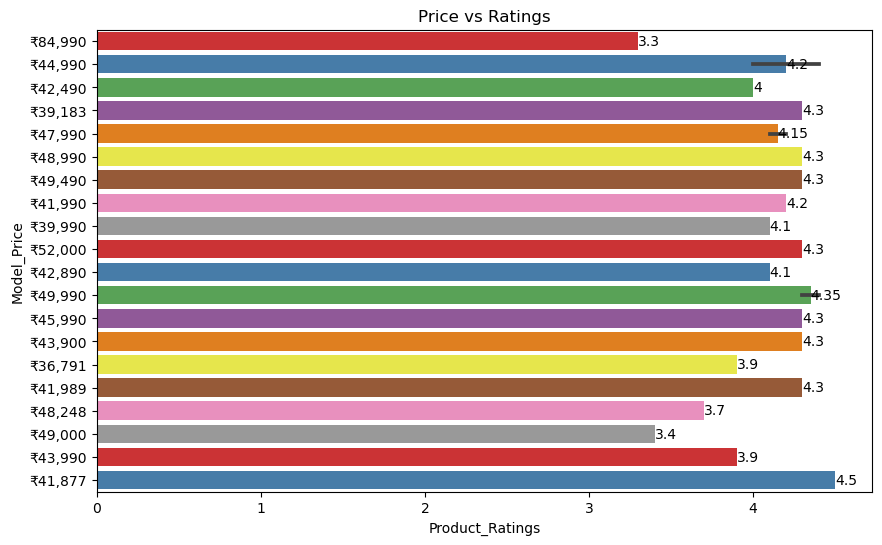

In [56]:
#Ratings vs Price

plt.figure(figsize=(10,6))
pc = sns.barplot(laptop_df, x='Product_Ratings', y='Model_Price', palette = 'Set1')
plt.title('Price vs Ratings')
for bars in pc.containers:
    pc.bar_label(bars)
plt.show()